In [1]:
pip install csaps

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from csaps import csaps

In [3]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Mounted at /content/drive


In [4]:
import os
folderPath = '/content/drive/MyDrive/ResearchProject/datafiles/001/combined/ext_activity'
file_list = os.listdir(folderPath)

In [5]:
ind = "001"
def df_constructor(filename, ind):
  df = pd.read_csv(f"/content/drive/MyDrive/ResearchProject/datafiles/{ind}/combined/ext_activity/{filename}")
  df['datetime'] = pd.to_datetime(df['datetime'])
  df['minute'] = (df['datetime'] - df['datetime'].min()).dt.total_seconds() / 60
  df['minute'] = df['minute'].astype(int)
  for i in range(len(df['minute'])):
    variation = np.random.uniform(low=-0.1, high=0.1)
    df['minute'].iloc[i] += variation

  df.rename(columns={'Glucose Value (mg/dL)' : 'glucose'}, inplace=True)
  df['delta_glucose'] = df['glucose'] - df['glucose'].iloc[0]

  return df

all_dfs = []
for filename in file_list:
  df = df_constructor(filename, ind)
  if df['glucose'].isnull().any():
    continue
  # if df['a'].iloc[0] == 40:
  #   all_dfs.append(df)
  all_dfs.append(df)
merged_df = pd.concat(all_dfs)


<ipython-input-5-82893cbd1781>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minute'].iloc[i] += variation
<ipython-input-5-82893cbd1781>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minute'].iloc[i] += variation
<ipython-input-5-82893cbd1781>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minute'].iloc[i] += variation
<ipython-input-5-82893cbd1781>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [6]:
merged_df.sort_values(by='minute', ascending=True, inplace=True)
merged_df.reset_index(drop=True, inplace=True)
merged_df

,datetime,glucose,hr,magnitude,absDistance,day,a,minute,delta_glucose
0,2020-02-16 15:40:00,99.0,80.199233,30.932726,33.067274,16,20.0,-0.073158,0.0
1,2020-02-18 15:00:00,124.0,93.306667,49.457748,14.542252,18,60.0,-0.045655,0.0
2,2020-02-21 15:40:00,98.0,97.256067,52.553365,11.446635,21,20.0,-0.039980,0.0
3,2020-02-14 15:20:00,95.0,82.133700,52.255087,11.744913,14,40.0,-0.017348,0.0
4,2020-02-22 13:00:00,95.0,74.895900,45.967331,18.032669,22,20.0,-0.012853,0.0
...,...,...,...,...,...,...,...,...,...
337,2020-02-18 17:00:00,107.0,64.111333,61.376819,2.623181,18,60.0,120.033013,-17.0
338,2020-02-22 08:45:00,93.0,90.904267,46.668547,17.331453,22,80.0,125.045452,-35.0
339,2020-02-22 08:50:00,91.0,74.417433,56.495007,7.504993,22,80.0,129.908289,-37.0
340,2020-02-22 08:55:00,90.0,79.741567,45.303357,18.696643,22,80.0,134.968173,-38.0


In [7]:
def GAM_model(df):
  fitted_spline = csaps(df['minute'], df['delta_glucose'], smooth = 0.01)
  return fitted_spline

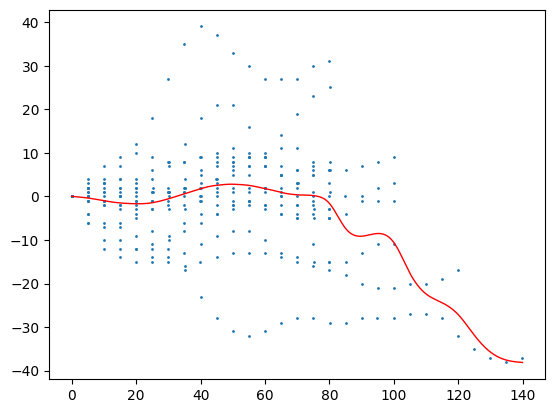

In [8]:
model = GAM_model(merged_df)
X = np.linspace(merged_df['minute'].min(), merged_df['minute'].max(), 11700)
Y = model(X)
plt.scatter(merged_df['minute'], merged_df['delta_glucose'], s=1)
plt.plot(X, Y, color="red", linewidth=1)
plt.show()

In [ ]:
model.spline.coeffs

array([[nan, nan, nan, ..., nan, nan, nan],
       [ 0., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [9]:
def GAM_graph(ind):
  folderPath = f'/content/drive/MyDrive/ResearchProject/datafiles/{ind}/combined/ext_activity'
  file_list = os.listdir(folderPath)
  all_dfs = []
  for filename in file_list:
    df = df_constructor(filename, ind)
    # if df['a'].iloc[0] == 40:
    #   all_dfs.append(df)
    if df['glucose'].isnull().any():
      continue
    all_dfs.append(df)
  merged_df = pd.concat(all_dfs)

  merged_df.sort_values(by='minute', ascending=True, inplace=True)
  merged_df.reset_index(drop=True, inplace=True)
  model = GAM_model(merged_df)
  X = np.linspace(merged_df['minute'].min(), merged_df['minute'].max(), 11700)
  Y = model(X)
  plt.scatter(merged_df['minute'], merged_df['delta_glucose'], s=1)
  plt.plot(X, Y, color="red", linewidth=1)
  plt.show()
  # Save the plot as a PDF
  plt.savefig(f'{ind}.png')

  # Download the saved plot
  files.download(f'{ind}.png')


In [ ]:
for i in range(1,17):
  if i < 10:
    GAM_graph(f'00{i}')
  else:
    GAM_graph(f'0{i}')

We want to test the model using LOOCV

In [ ]:
merged_df

,datetime,glucose,hr,magnitude,absDistance,day,a,minute,delta_glucose
0,2020-02-17 08:20:00,108.0,87.055667,46.377917,17.622083,17,20.0,-0.098743,4.0
0,2020-02-20 09:20:00,95.0,86.609967,43.550816,20.449184,20,40.0,-0.097912,-1.0
0,2020-02-21 15:40:00,98.0,97.256067,52.553365,11.446635,21,20.0,-0.097419,-2.0
0,2020-02-15 09:20:00,88.0,NaN,NaN,NaN,15,20.0,-0.095839,-3.0
0,2020-02-17 17:20:00,89.0,86.761667,39.666463,24.333537,17,40.0,-0.093308,0.0
...,...,...,...,...,...,...,...,...,...
24,2020-02-18 17:00:00,107.0,64.111333,61.376819,2.623181,18,60.0,120.058090,-19.0
25,2020-02-22 08:45:00,93.0,90.904267,46.668547,17.331453,22,80.0,125.080957,-35.0
26,2020-02-22 08:50:00,91.0,74.417433,56.495007,7.504993,22,80.0,129.991101,-37.0
27,2020-02-22 08:55:00,90.0,79.741567,45.303357,18.696643,22,80.0,135.010492,-38.0


In [ ]:
def leave_one_out_cv(df, i):
  test_df = df.iloc[i]
  train_df = df.drop(index=i)

  model_fit = GAM_model(train_df)
  pred = model_fit(test_df['minute'])
  return (pred - test_df['delta_glucose'])**2

total_SquaredError = 0
for i in range(len(merged_df)):
  total_SquaredError += leave_one_out_cv(merged_df, i)

mse = total_SquaredError / len(merged_df)
mse**(1/2)

10.045990798322132

In [ ]:
def poly_extractions(fit):
  coeffs = fit.coeffs
  knots = fit.breaks
  polynomials = []
  for i in range(len(knots) - 1):
    a = coeffs[0][i]
    b = coeffs[1][i]
    c = coeffs[2][i]
    d = coeffs[3][i]

    pol = lambda x: a*x**3 + b*x**2 + c*x + d
    pol_str = f"{a:.3f}x^3 + {b:.3f}x^2 + {c:.3f}x + {d:.3f}"
    polynomials.append(pol_str)
  return [knots, polynomials]

poly_extractions(model.spline)

AttributeError: 'CubicSmoothingSpline' object has no attribute 'coeffs'

<ipython-input-16-8630fe469a8a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minute'].iloc[i] += variation


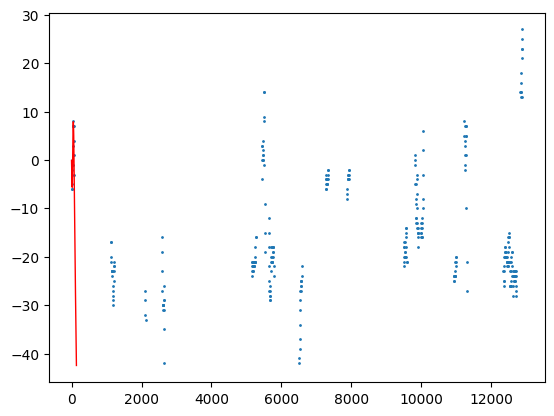

In [ ]:
# KNN Model Activity Bouts
df = pd.read_csv("/content/drive/MyDrive/ResearchProject/datafiles/001/KNNactivity_v1.csv")

df['datetime'] = pd.to_datetime(df['datetime'])
df['minute'] = (df['datetime'] - df['datetime'].min()).dt.total_seconds() / 60
df['minute'] = df['minute'].astype(int)
for i in range(len(df['minute'])):
  variation = np.random.uniform(low=-0.1, high=0.1)
  df['minute'].iloc[i] += variation

df.rename(columns={'Glucose Value (mg/dL)' : 'glucose'}, inplace=True)
df['delta_glucose'] = df['glucose'] - df['glucose'].iloc[0]

df.sort_values(by='minute', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

model = GAM_model(df)
X = np.linspace(merged_df['minute'].min(), merged_df['minute'].max(), 11700)
Y = model(X)
plt.scatter(df['minute'], df['delta_glucose'], s=1)
plt.plot(X, Y, color="red", linewidth=1)
plt.show()


,datetime,acc_x,acc_y,acc_z,predictions,a,minute
0,2020-02-13 15:35:00,36.004896,-13.419479,38.753333,1,30.0,-0.068930
1,2020-02-13 15:40:00,32.283854,8.749167,27.175313,1,30.0,5.052202
2,2020-02-13 15:45:00,31.977604,-29.877500,10.387813,1,30.0,9.943341
3,2020-02-13 15:50:00,11.956146,-53.941979,21.766458,1,30.0,14.931289
4,2020-02-13 15:55:00,19.089688,-45.705417,4.902708,1,30.0,19.932437
...,...,...,...,...,...,...,...
556,2020-02-22 17:35:00,36.446875,-3.382292,50.766250,1,40.0,13079.954262
557,2020-02-22 17:40:00,57.098854,-2.911563,18.838750,0,40.0,13084.939709
558,2020-02-22 17:45:00,52.554271,-1.375938,-24.217188,0,40.0,13090.068789
559,2020-02-22 17:50:00,42.012396,-5.351042,13.068021,0,40.0,13095.099590
